# Prototype code to rank n students who rank k students each

## Author: Michel Tsamados, etc
## Date: 20.06.21

### Variables:

n = total number of students in class

k = number of students each student ranks

There many beautiful and elegant comparison algorithms https://en.wikipedia.org/wiki/Sorting_algorithm#Comparison_of_algorithms and our goal is not to be optimal in our implementation but rather to server as well as we can both the educators and students in providing a faster but more rigorous assessment. Below we illustrate our approach with the following algorithms 

1) Ranking based on Elo algorithm https://en.wikipedia.org/wiki/Elo_rating_system

2) Ranking based on Quicksort algorithm 

# 1) Elo approach 

In [269]:
#https://github.com/rshk/elo
from elo import elo, expected
# from __future__ import division


def expected(A, B):
    """
    Calculate expected score of A in a match against B

    :param A: Elo rating for player A
    :param B: Elo rating for player B
    """
    return 1 / (1 + 10 ** ((B - A) / 400))


def elo(old, exp, score, kappa=32):
    """
    Calculate the new Elo rating for a player

    :param old: The previous Elo rating
    :param exp: The expected score for this match
    :param score: The actual score for this match
    :param k: The k-factor for Elo (default: 32)
    """
    return old + kappa * (score - exp)


# def test_expected():
#     assert round(expected(1613, 1609), 3) == 0.506
#     assert round(expected(1613, 1477), 3) == 0.686
#     assert round(expected(1613, 1388), 3) == 0.785
#     assert round(expected(1613, 1586), 3) == 0.539
#     assert round(expected(1613, 1720), 3) == 0.351

#     pairs = [
#         (0, 0),
#         (1, 1),
#         (10, 20),
#         (123, 456),
#         (2400, 2500),
#     ]

#     for a, b in pairs:
#         assert round(expected(a, b) + expected(b, a), 3) == 1.0


# def test_elo():
#     exp = 0
#     exp += expected(1613, 1609)
#     exp += expected(1613, 1477)
#     exp += expected(1613, 1388)
#     exp += expected(1613, 1586)
#     exp += expected(1613, 1720)
#     score = (0 + 0.5 + 1 + 1 + 0)

#     assert round(elo(1613, exp, score, k=32)) == 1601
#     assert round(elo(1613, exp, 3, k=32)) == 1617



In [265]:
exp=0
exp += expected(1613, 1009)
exp
#player wins almost every time (97% of the time)

0.9700234108404839

In [266]:
# from elo import elo
# elo(1613, 2.867, 3.5, k=32)  # 1601

In [345]:
# from random import seed
import numpy as np 
import matplotlib.pyplot as plt

from random import random
print(random(), random(), random())

0.5714025946899135 0.4288890546751146 0.5780913011344704


In [329]:
def argsort(seq):

    #return sorted(range(len(seq)), key = seq.__getitem__)

    #return [i for (v, i) in sorted((v, i) for (i, v) in enumerate(seq))]

    return [x for x,y in sorted(enumerate(seq), key = lambda x: x[1])] 

In [706]:
def synthetic_assessment(n=20,k=5,elo_default=1500.,elo_min=1000., elo_max=2000., kappa=32, printing=False):


    # Initialise number of copies/students to rank (n) and the size of the student assessment pool (k)
    # Each of n students ranks k assessments (in order 1,2....k-1,k)
    # The Elo algorithm allows for equal rankings but we suggest to avoid this as students tend to be too 'nice' otherwise
    # n=20
    # k=5

    # Initialise the synthetic distribution of elo scores 
    elo_true=[]
    elo_predict=[]

    for i in range(n):
    # no prior information on the level of each student -> all assessment have an equal Elo prior score of 1500
        elo_predict.append(elo_default)

    # we synthesie a distribution of  assessment 
    # regularly spaced assessments with 
        elo_min = elo_min #minimum Elo value
        elo_max = elo_max #minimum Elo value
        elo_range = elo_max - elo_min

    #     elo_true.append(1000+1000*random())
        elo_true.append(elo_min+elo_range*i/n)

    # randomly distributed assessments
#         elo_true.append(elo_min+elo_range*random.random())


    # Loop over students' peer feedback 
    wins=np.zeros((n))
    games=np.zeros((n))

    #1: no prior information 
    #2: two step assessment 
    #3: prior knowledge (i.e. ask the students for their self estimated ranking)
    case = 1 

    for l in range(n):
        ii=[]        
        for m in range(k):
            ii.append(int(random.random()*n)) #select list of students to assess for assessor i at random 
        for m in range(k):
            for o in range(m+1,k):
                if (ii[m]==ii[o]):
                    if printing:
                        print('i=j you lose one comparison')
                else:
                    if printing:
                        print(ii[m],ii[o],m,o,elo_true[ii[m]],elo_true[ii[o]])
                    exp  = expected(elo_true[ii[m]], elo_true[ii[o]])
                    games[ii[m]]=games[ii[m]]+1
                    games[ii[o]]=games[ii[o]]+1
                    if random.random()>exp: #here can add error
                        if printing:
                            print('i loses ',exp )
                        wins[ii[o]]=wins[ii[o]]+1
                    else:
                        if printing:
                            print('i wins ',exp)
                        wins[ii[m]]=wins[ii[m]]+1
        
        elo_predict[l]=elo(elo_default,games[l]*0.5,wins[l], kappa=kappa) #kappa = K-factor in Elo algorithm         
#         elo_predict[l]=elo(elo_true[l]+0.1*(0.5-random.random()),games[l]*0.5,wins[l], kappa=kappa) #kappa = K-factor in Elo algorithm 
    return elo_predict,elo_true,games,wins

In [550]:
int(ii[m])

16

In [539]:
import random
random.random()
print(random.random())
i=int(random.random()*n)
int(random.random()*n)

0.2144004325789165


16

In [717]:


elo_predict, elo_true, games, wins = synthetic_assessment(n=60,k=5,elo_default=1500.,elo_min=1000., elo_max=2000., kappa=32, printing=True)


25 59 0 1 1416.6666666666667 1983.3333333333335
i loses  0.03689822842060309
25 12 0 2 1416.6666666666667 1200.0
i wins  0.7768206153781979
25 16 0 3 1416.6666666666667 1266.6666666666667
i wins  0.7033850034718286
25 38 0 4 1416.6666666666667 1633.3333333333335
i loses  0.22317938462180217
59 12 1 2 1983.3333333333335 1200.0
i wins  0.9891128920501004
59 16 1 3 1983.3333333333335 1266.6666666666667
i wins  0.9841008848181481
59 38 1 4 1983.3333333333335 1633.3333333333335
i wins  0.8823382970469413
12 16 2 3 1200.0 1266.6666666666667
i loses  0.4052193438583776
12 38 2 4 1200.0 1633.3333333333335
i loses  0.0762469623435665
16 38 3 4 1266.6666666666667 1633.3333333333335
i loses  0.10806089014070933
2 15 0 1 1033.3333333333333 1250.0
i loses  0.22317938462180217
2 38 0 2 1033.3333333333333 1633.3333333333335
i loses  0.030653430031715466
2 3 0 3 1033.3333333333333 1050.0
i wins  0.47603311975864937
2 38 0 4 1033.3333333333333 1633.3333333333335
i loses  0.030653430031715466
15 38 1 2 

11 17 1 2 1183.3333333333333 1283.3333333333333
i loses  0.35993500019711494
11 25 1 3 1183.3333333333333 1416.6666666666667
i loses  0.20698847532498887
11 14 1 4 1183.3333333333333 1233.3333333333333
i loses  0.4285368825916186
17 25 2 3 1283.3333333333333 1416.6666666666667
i wins  0.31701401305280846
17 14 2 4 1283.3333333333333 1233.3333333333333
i loses  0.5714631174083814
25 14 3 4 1416.6666666666667 1233.3333333333333
i wins  0.7418012093958842
48 36 0 1 1800.0 1600.0
i wins  0.7597469266479578
48 34 0 2 1800.0 1566.6666666666665
i wins  0.793011524675011
48 6 0 3 1800.0 1100.0
i wins  0.9825279085051666
48 6 0 4 1800.0 1100.0
i wins  0.9825279085051666
36 34 1 2 1600.0 1566.6666666666665
i loses  0.5478238781693018
36 6 1 3 1600.0 1100.0
i wins  0.9467597847979775
36 6 1 4 1600.0 1100.0
i wins  0.9467597847979775
34 6 2 3 1566.6666666666665 1100.0
i wins  0.9362163243310649
34 6 2 4 1566.6666666666665 1100.0
i wins  0.9362163243310649
i=j you lose one comparison
45 41 0 1 1750

i wins  0.8083176725494586
i=j you lose one comparison
18 47 0 3 1300.0 1783.3333333333335
i loses  0.058288709978716845
18 42 0 4 1300.0 1700.0
i loses  0.09090909090909091
3 18 1 2 1050.0 1300.0
i loses  0.19168232745054142
3 47 1 3 1050.0 1783.3333333333335
i loses  0.014465665740426055
3 42 1 4 1050.0 1700.0
i loses  0.023164422043215255
18 47 2 3 1300.0 1783.3333333333335
i loses  0.058288709978716845
18 42 2 4 1300.0 1700.0
i loses  0.09090909090909091
47 42 3 4 1783.3333333333335 1700.0
i loses  0.6176782661692294
i=j you lose one comparison
30 50 0 2 1500.0 1833.3333333333335
i wins  0.1279931077766787
30 46 0 3 1500.0 1766.6666666666665
i loses  0.17725503036342644
30 16 0 4 1500.0 1266.6666666666667
i wins  0.7930115246750109
30 50 1 2 1500.0 1833.3333333333335
i loses  0.1279931077766787
30 46 1 3 1500.0 1766.6666666666665
i loses  0.17725503036342644
30 16 1 4 1500.0 1266.6666666666667
i wins  0.7930115246750109
50 46 2 3 1833.3333333333335 1766.6666666666665
i loses  0.594

In [708]:
print(argsort(elo_true))
print(argsort(elo_predict))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[12, 18, 14, 13, 21, 22, 8, 30, 9, 16, 4, 5, 11, 15, 2, 25, 19, 23, 7, 10, 26, 17, 27, 0, 1, 3, 6, 24, 28, 32, 20, 29, 33, 31, 40, 44, 34, 38, 41, 35, 36, 37, 48, 46, 43, 57, 52, 51, 54, 49, 42, 59, 47, 39, 50, 58, 45, 56, 55, 53]


In [673]:
# elo_default=1500.
# elo_default

In [638]:
print(wins)
games

[ 2.  2.  1.  0.  4.  4.  5.  5.  6.  1.  4.  2.  3.  5.  8.  2.  3.  3.
  8. 10.  2.  8. 16. 11.  6. 10. 13. 11.  8. 13.  3. 16. 13. 10. 15.  9.
 15. 11.  3. 11. 16.  6. 16. 16. 13. 25. 15.  8. 13. 19. 17. 10.  2. 18.
 10. 15. 39. 16. 18. 12.]


array([24., 20., 22., 12., 20., 18., 12., 20., 38.,  8., 22.,  4., 16.,
       24., 32., 14., 18., 16., 20., 22.,  4., 24., 32., 24., 16., 18.,
       34., 20., 16., 28.,  8., 30., 32., 16., 28., 20., 24., 14.,  4.,
       16., 24.,  8., 20., 20., 16., 30., 20., 12., 16., 32., 20., 12.,
        4., 20., 12., 16., 48., 20., 20., 12.])

(array([ 1.,  3.,  4.,  7., 11., 10.,  9.,  9.,  3.,  3.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <BarContainer object of 10 artists>)

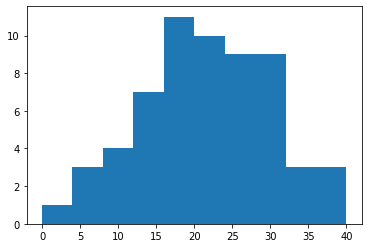

In [718]:
#Not so homogeneous sampling
plt.hist(games)

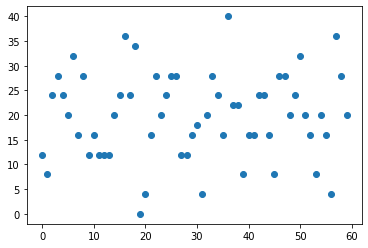

In [719]:
plt.scatter(argsort(elo_true),games)

In [674]:
# # elo(1613, 2.867, 3.5, k=32)  # 1601i=0
# # elo(elo_default,games[i]*0.5,wins[i], kappa=32)
# plt.scatter(argsort(elo_true),argsort(elo_predict))

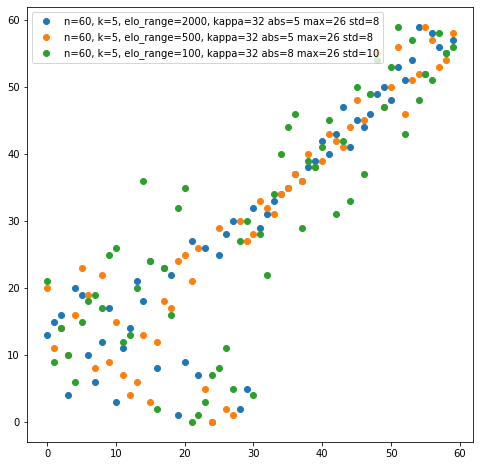

In [710]:
plt.figure(figsize=(8,8))
# elo_predict, elo_true = synthetic_assessment(n=20,k=5,elo_default=1500.,elo_min=1000., elo_max=2000., kappa=32)
# plt.scatter(argsort(elo_true),argsort(elo_predict),label='n=20, k=5, elo_range=1000, kappa=32')
# elo_predict, elo_true = synthetic_assessment(n=60,k=5,elo_default=1500.,elo_min=1000., elo_max=2000., kappa=32)
# plt.scatter(argsort(elo_true),argsort(elo_predict),label='n=60, k=5, elo_range=1000, kappa=32')


elo_predict, elo_true , games, wins = synthetic_assessment(n=60,k=35,elo_default=1500.,elo_min=500., elo_max=2500., kappa=32,printing=False)
a=(np.mean(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
b=(np.mean(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
c=(np.max(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
d=(np.std(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
plt.scatter(argsort(elo_true),argsort(elo_predict),label='n=60, k=5, elo_range=2000, kappa=32'+' abs='+str(int(b))+' max='+str(c)+' std='+str(int(d)))



elo_predict, elo_true, games, wins = synthetic_assessment(n=60,k=35,elo_default=1500.,elo_min=1250., elo_max=1750., kappa=32,printing=False)
a=(np.mean(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
b=(np.mean(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
c=(np.max(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
d=(np.std(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
plt.scatter(argsort(elo_true),argsort(elo_predict),label='n=60, k=5, elo_range=500, kappa=32'+' abs='+str(int(b))+' max='+str(c)+' std='+str(int(d)))



elo_predict, elo_true, games, wins = synthetic_assessment(n=60,k=35,elo_default=1500.,elo_min=1450., elo_max=1550., kappa=32,printing=False)
a=(np.mean(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
b=(np.mean(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
c=(np.max(np.abs(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict)))))
d=(np.std(np.asarray(argsort(elo_true))-np.asarray(argsort(elo_predict))))
plt.scatter(argsort(elo_true),argsort(elo_predict),label='n=60, k=5, elo_range=100, kappa=32'+' abs='+str(int(b))+' max='+str(c)+' std='+str(int(d)))






plt.legend()

# 2) Quicksort approach

In [336]:
import random
random.seed(9001)
random()

TypeError: 'module' object is not callable

In [330]:
! pwd

/Users/micheltsamados/Google Drive/Teaching_Michel/Outreach/Elo/elo-master-simple


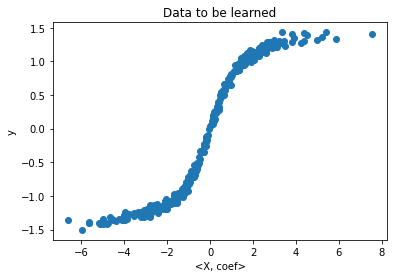

Performance of ranking  0.9787878787878788
Performance of linear regression  0.9587570621468926


In [337]:
import itertools
import numpy as np

from sklearn import svm, linear_model
from sklearn.model_selection import KFold


def transform_pairwise(X, y):
    """Transforms data into pairs with balanced labels for ranking
    Transforms a n-class ranking problem into a two-class classification
    problem. Subclasses implementing particular strategies for choosing
    pairs should override this method.
    In this method, all pairs are choosen, except for those that have the
    same target value. The output is an array of balanced classes, i.e.
    there are the same number of -1 as +1
    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        The data
    y : array, shape (n_samples,) or (n_samples, 2)
        Target labels. If it's a 2D array, the second column represents
        the grouping of samples, i.e., samples with different groups will
        not be considered.
    Returns
    -------
    X_trans : array, shape (k, n_feaures)
        Data as pairs
    y_trans : array, shape (k,)
        Output class labels, where classes have values {-1, +1}
    """
    X_new = []
    y_new = []
    y = np.asarray(y)
    if y.ndim == 1:
        y = np.c_[y, np.ones(y.shape[0])]
    comb = itertools.combinations(range(X.shape[0]), 2)
    for k, (i, j) in enumerate(comb):
        if y[i, 0] == y[j, 0] or y[i, 1] != y[j, 1]:
            # skip if same target or different group
            continue
        X_new.append(X[i] - X[j])
        y_new.append(np.sign(y[i, 0] - y[j, 0]))
        # output balanced classes
        if y_new[-1] != (-1) ** k:
            y_new[-1] = - y_new[-1]
            X_new[-1] = - X_new[-1]
    return np.asarray(X_new), np.asarray(y_new).ravel()


class RankSVM(svm.LinearSVC):
    """Performs pairwise ranking with an underlying LinearSVC model
    Input should be a n-class ranking problem, this object will convert it
    into a two-class classification problem, a setting known as
    `pairwise ranking`.
    See object :ref:`svm.LinearSVC` for a full description of parameters.
    """

    def fit(self, X, y):
        """
        Fit a pairwise ranking model.
        Parameters
        ----------
        X : array, shape (n_samples, n_features)
        y : array, shape (n_samples,) or (n_samples, 2)
        Returns
        -------
        self
        """
        X_trans, y_trans = transform_pairwise(X, y)
        super(RankSVM, self).fit(X_trans, y_trans)
        return self

    def predict(self, X):
        """
        Predict an ordering on X. For a list of n samples, this method
        returns a list from 0 to n-1 with the relative order of the rows of X.
        Parameters
        ----------
        X : array, shape (n_samples, n_features)
        Returns
        -------
        ord : array, shape (n_samples,)
            Returns a list of integers representing the relative order of
            the rows in X.
        """
        if hasattr(self, 'coef_'):
            np.argsort(np.dot(X, self.coef_.T))
        else:
            raise ValueError("Must call fit() prior to predict()")

    def score(self, X, y):
        """
        Because we transformed into a pairwise problem, chance level is at 0.5
        """
        X_trans, y_trans = transform_pairwise(X, y)
        return np.mean(super(RankSVM, self).predict(X_trans) == y_trans)


if __name__ == '__main__':
    # as showcase, we will create some non-linear data
    # and print the performance of ranking vs linear regression

    np.random.seed(1)
    n_samples, n_features = 300, 5
    true_coef = np.random.randn(n_features)
    X = np.random.randn(n_samples, n_features)
    noise = np.random.randn(n_samples) / np.linalg.norm(true_coef)
    y = np.dot(X, true_coef)
    y = np.arctan(y)  # add non-linearities
    y += .1 * noise  # add noise
    Y = np.c_[y, np.mod(np.arange(n_samples), 5)]  # add query fake id
    cv = KFold(n_splits=5)
    train, test = cv.split(X, y).__next__()

    # make a simple plot out of it
    import pylab as pl

    pl.scatter(np.dot(X, true_coef), y)
    pl.title('Data to be learned')
    pl.xlabel('<X, coef>')
    pl.ylabel('y')
    pl.show()

    # print the performance of ranking
    rank_svm = RankSVM().fit(X[train], Y[train])
    print('Performance of ranking ', rank_svm.score(X[test], Y[test]))

    # and that of linear regression
    ridge = linear_model.RidgeCV(fit_intercept=True)
    ridge.fit(X[train], y[train])
    X_test_trans, y_test_trans = transform_pairwise(X[test], y[test])
    score = np.mean(np.sign(np.dot(X_test_trans, ridge.coef_)) == y_test_trans)
    print('Performance of linear regression ', score)